In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Data analysis and preprocessing


Dataset description:

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [29]:
original_dataset = pd.read_csv(r'CC GENERAL.csv')
original_dataset.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1204,C11248,39.977967,0.300000,432.05,432.05,0.00,0.000000,0.200000,0.200000,0.000000,0.000000,0,3,10000.0,1282.534281,55.522218,0.000000,10
8109,C18329,16.176672,0.363636,95.55,0.00,95.55,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,1000.0,136.961964,59.907285,0.000000,12
2109,C12175,231.995439,1.000000,2310.21,1660.51,649.70,0.000000,1.000000,1.000000,0.916667,0.000000,0,67,3000.0,1871.658725,173.610118,0.727273,12
4277,C14395,10.386311,0.818182,171.60,0.00,171.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,168.370514,82.263245,0.454545,12
8671,C18908,23.223559,0.181818,387.32,159.00,228.32,0.000000,0.166667,0.083333,0.083333,0.000000,0,6,1200.0,86.332384,162.317863,0.000000,12
715,C10742,3714.539663,1.000000,1307.16,1307.16,0.00,4245.840374,1.000000,1.000000,0.000000,0.333333,4,24,5000.0,1529.771263,1212.951385,0.000000,12
193,C10200,5462.897068,1.000000,1453.32,0.00,1453.32,0.000000,0.500000,0.000000,0.500000,0.000000,0,18,16500.0,1382.269127,1755.253802,0.000000,12
3850,C13958,874.571604,1.000000,385.70,316.70,69.00,289.822557,0.416667,0.333333,0.166667,0.166667,2,8,2000.0,357.969443,231.854555,0.000000,12
8541,C18773,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12
3132,C13222,432.058764,1.000000,817.62,254.14,563.48,0.000000,0.916667,0.250000,0.666667,0.000000,0,25,5100.0,2797.052769,314.307392,0.000000,12


In [30]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [31]:
shape = original_dataset.shape
print("This dataset contains " + str(shape[0]) + " samples with " + str(shape[1]) + " different features")

This dataset contains 8950 samples with 18 different features


In [32]:
original_dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [33]:
n = original_dataset[original_dataset['BALANCE'] > 5000]['CUST_ID'].count()
print("credit card users with high balance (>5000): {n} ({percent:.2f}))".format(n = n, percent = n/shape[0]*100))

n = original_dataset[original_dataset['BALANCE'] < 500]['CUST_ID'].count()
print("credit card users with low balance (<500): {n} ({percent:.2f}))".format(n = n, percent = n/shape[0]*100))

credit card users with high balance (>5000): 682 (7.62))
credit card users with low balance (<500): 3678 (41.09))


In [34]:
n = original_dataset[original_dataset['PURCHASES'] == original_dataset['ONEOFF_PURCHASES']]['CUST_ID'].count()
n = (n, shape[0] - n)
n
print("{fullpay} ({fullpaypercent:.2f}) customers made purchases with full payment in one go".format(fullpay=n[0], fullpaypercent=n[0]/shape[0]*100))
print("{pay} ({paypercent:.2f}) customers didn't make purchases with full payment in one go".format(pay=n[1], paypercent=n[1]/shape[0]*100))

3916 (43.75) customers made purchases with full payment in one go
5034 (56.25) customers didn't make purchases with full payment in one go


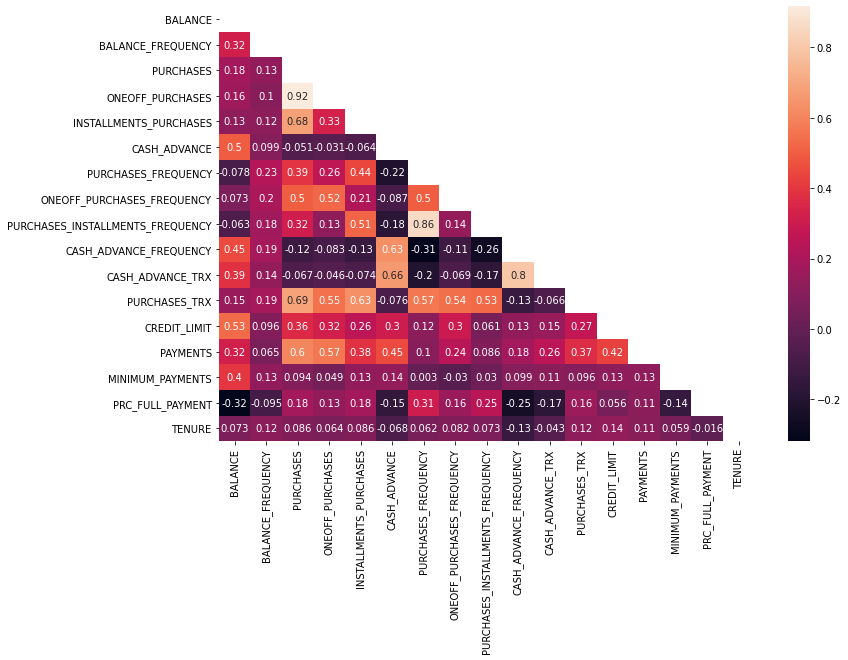

In [35]:
correlation = original_dataset.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plot = sns.heatmap(data=correlation, mask=mask, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plot.axes.figure.set_figheight(8)
plot.axes.figure.set_figwidth(12)

CUST_ID is unique to every customer and won't play any important role in clustering so we'll drop it

In [36]:
data = original_dataset.drop('CUST_ID', axis=1)
cols = data.columns
cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Handling null values in dataset

In [37]:
def check_null(dataset):
    null_count = list(dataset.isnull().sum() != 0)
    x = False
    for n in null_count:
        x = x or n
    return x

In [38]:
check_null(original_dataset)

True

In [39]:
null_cols = [(col, shape[0] - original_dataset[col].count()) for col in original_dataset.columns if original_dataset[col].count() != shape[0]]
print("columns with null or empty values", null_cols)

columns with null or empty values [('CREDIT_LIMIT', 1), ('MINIMUM_PAYMENTS', 313)]


There's only one missing value in credit limit so we can ignore that and drop it

In [40]:
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)
data.shape

(8949, 17)

There are more than 300 sample with null values in MINIMUM_PAYMENTS columns. To impute this we will look into data to find any important relation with other columns

In [41]:
correlation['MINIMUM_PAYMENTS']

BALANCE                             0.398684
BALANCE_FREQUENCY                   0.132569
PURCHASES                           0.093860
ONEOFF_PURCHASES                    0.048755
INSTALLMENTS_PURCHASES              0.132172
CASH_ADVANCE                        0.140107
PURCHASES_FREQUENCY                 0.003030
ONEOFF_PURCHASES_FREQUENCY         -0.030327
PURCHASES_INSTALLMENTS_FREQUENCY    0.030073
CASH_ADVANCE_FREQUENCY              0.098838
CASH_ADVANCE_TRX                    0.109739
PURCHASES_TRX                       0.096333
CREDIT_LIMIT                        0.126671
PAYMENTS                            0.126651
MINIMUM_PAYMENTS                    1.000000
PRC_FULL_PAYMENT                   -0.140379
TENURE                              0.059444
Name: MINIMUM_PAYMENTS, dtype: float64

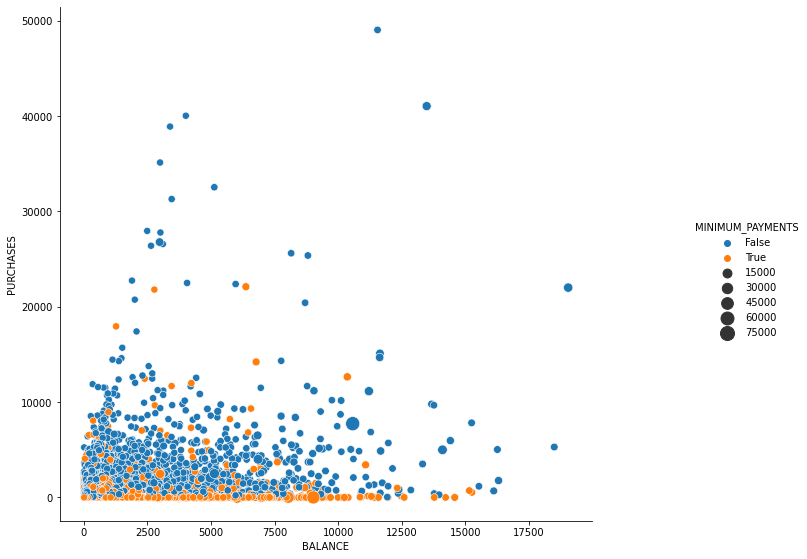

In [42]:
IN_ONE_GO = data['PURCHASES'] == data['ONEOFF_PURCHASES']
# min_pay_plot = sns.relplot(data=data[data['PURCHASES'] <= 5000], x='BALANCE', y='PURCHASES', hue=IN_ONE_GO, size='MINIMUM_PAYMENTS', sizes=(50, 200))
min_pay_plot = sns.relplot(data=data, x='BALANCE', y='PURCHASES', hue=IN_ONE_GO, size='MINIMUM_PAYMENTS', sizes=(50, 200))
min_pay_plot.ax.figure.set_figheight(8)
min_pay_plot.ax.figure.set_figwidth(12)


MINIMUM_PAYMENTS doesn't seem to have any major relation with any other feature so we'll take a look at minimum payments stats

In [43]:
data.MINIMUM_PAYMENTS.mean(), data.MINIMUM_PAYMENTS.median()

(864.3049429326078, 312.4522915)

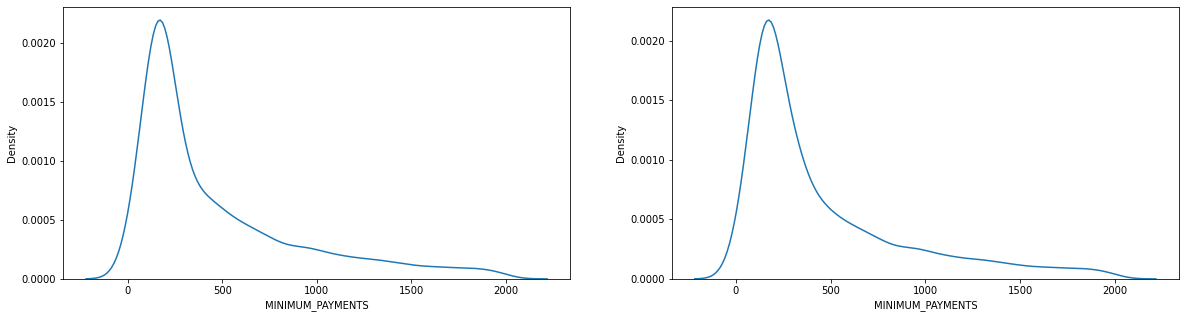

In [44]:
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
sns.kdeplot(data[data.MINIMUM_PAYMENTS < 2000]['MINIMUM_PAYMENTS'], ax=ax)
# sns.kdeplot(data.MINIMUM_PAYMENTS)

data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].median()
# sns.kdeplot(data.MINIMUM_PAYMENTS)
ax = plt.subplot(1, 2, 2)
sns.kdeplot(data[data.MINIMUM_PAYMENTS < 2000]['MINIMUM_PAYMENTS'], ax=ax)

plt.show()

So, imputing the missing values didn't change the distribution much so it is safe to continue on with the analysis.

In [45]:
# checking for nulls values
check_null(dataset=data)

False

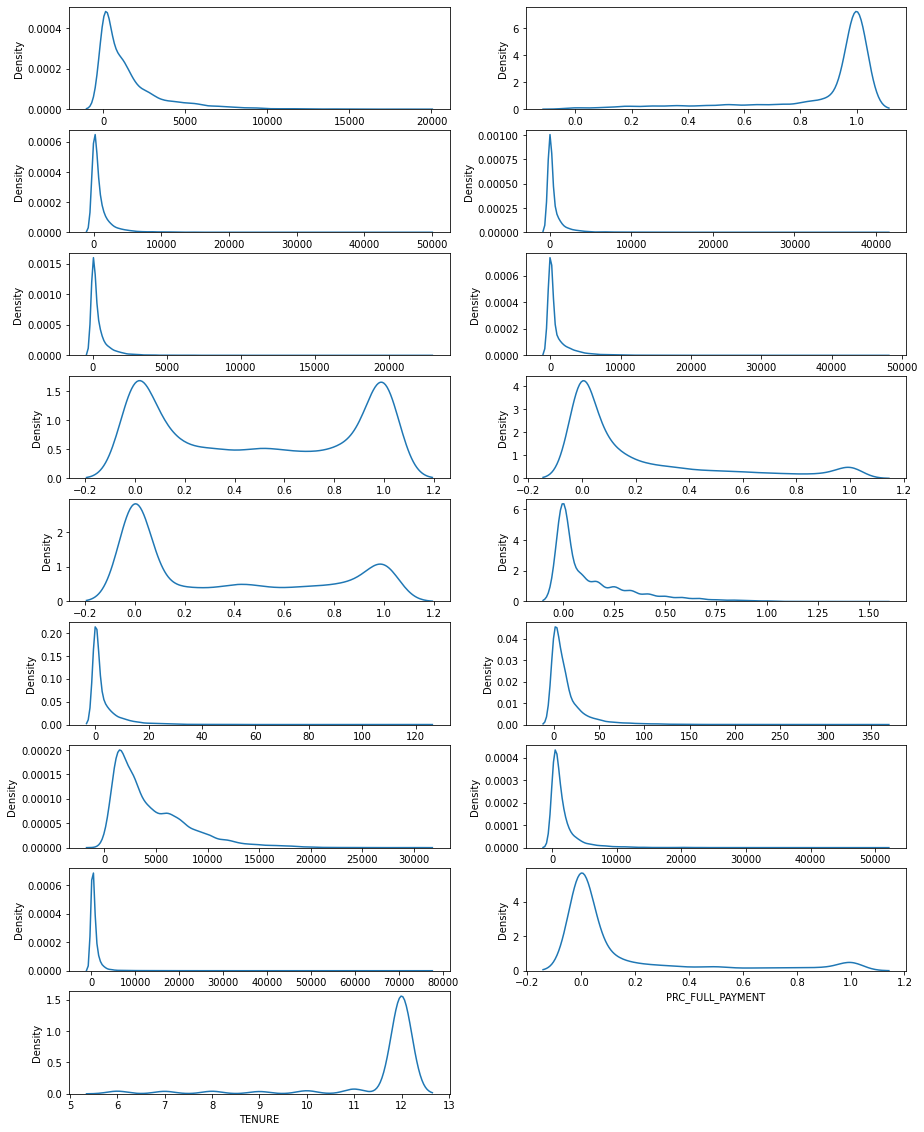

In [46]:
plt.figure(figsize=(15, 20)), 
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

From the plots above it can be seen that there is a lot of skewness in the data. Next wewill try handling that.

In [47]:
for col in cols:
    data[col] = np.log(1 + data[col])

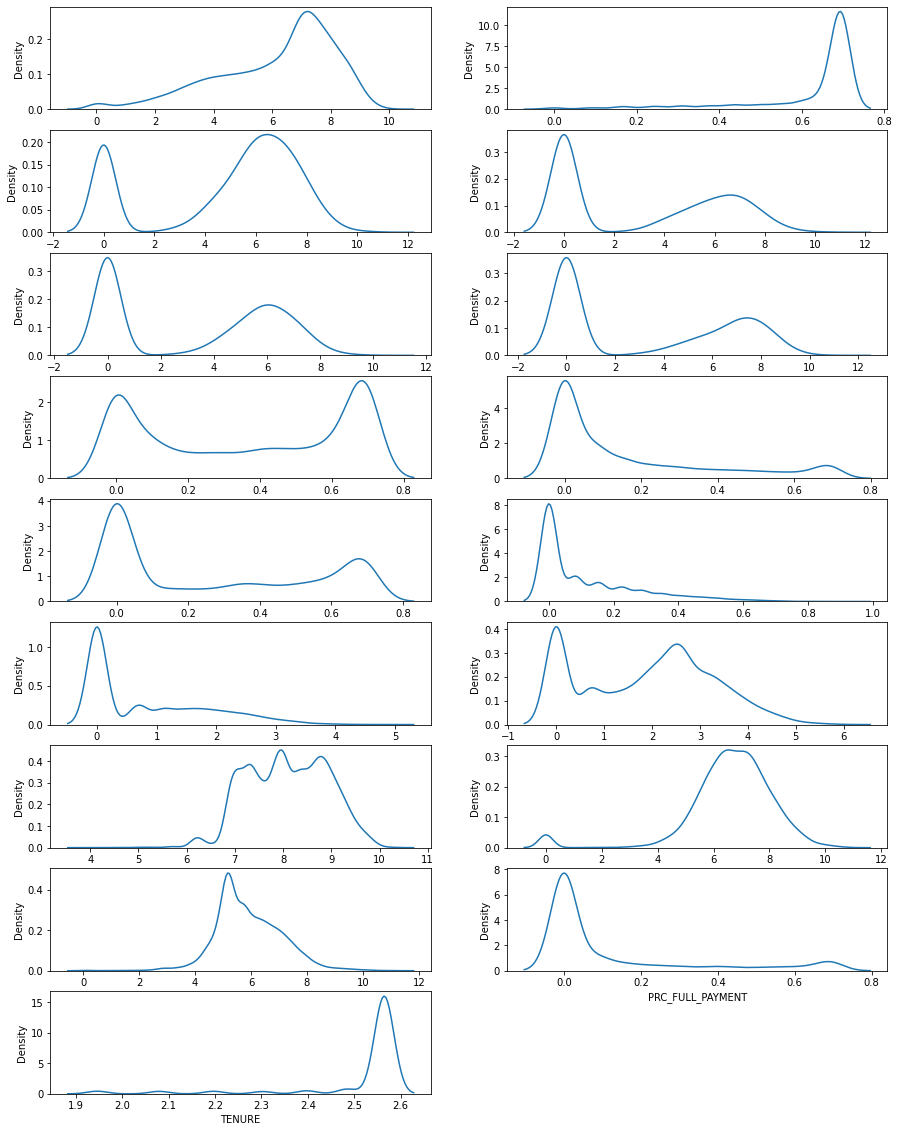

In [48]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(data[col], ax=ax)
plt.show()

So there are no null values left in our data and the distribution is not that skewed too. Now we will implement clustering techniques.

clustering using KMeans

using elbow method to determine optimal number of clusters

In [49]:
clusters=[]
for i in range(1, 8):
    kmean = KMeans(n_clusters=i).fit(data)
    clusters.append(kmean.inertia_)  

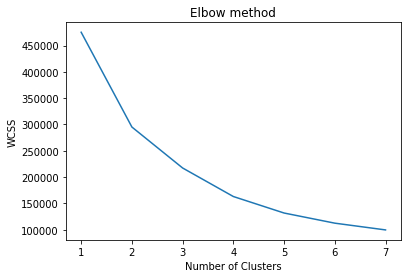

In [50]:
plt.plot(range(1, 8), clusters)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(data)
labels = kmeans.labels_

In [52]:
clusters_kmeans=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)

interpreting clusters

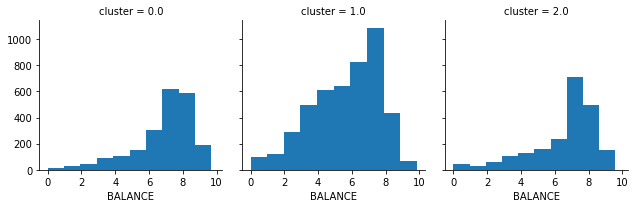

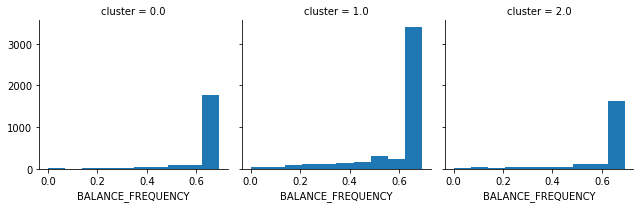

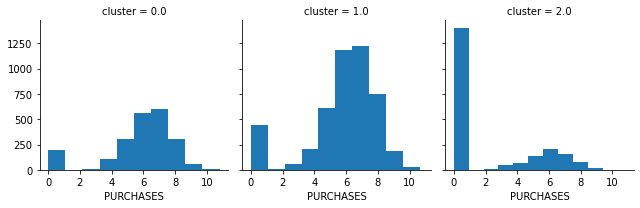

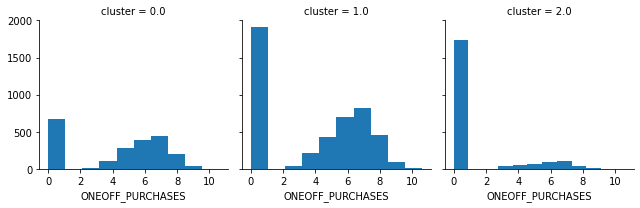

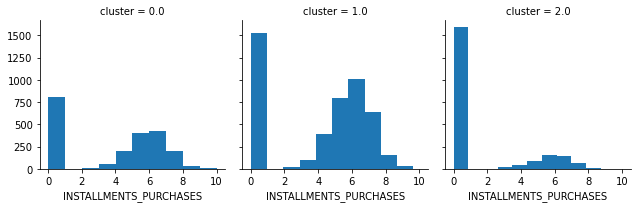

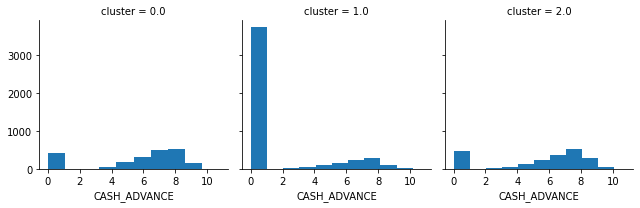

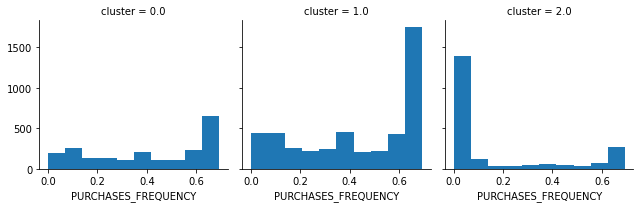

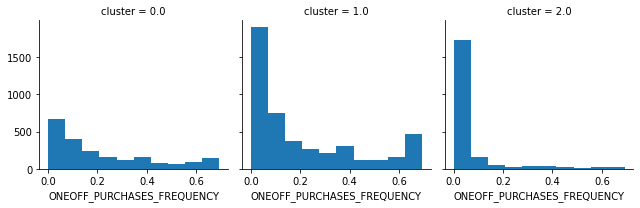

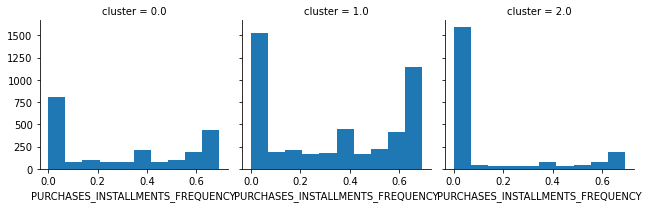

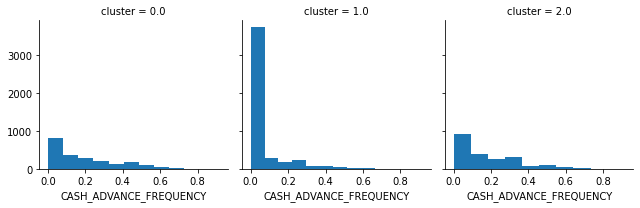

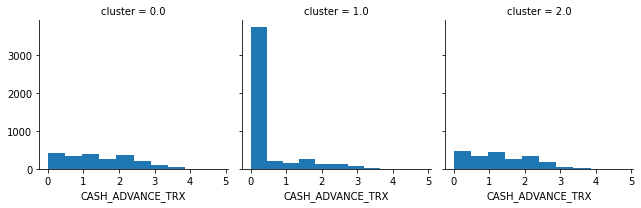

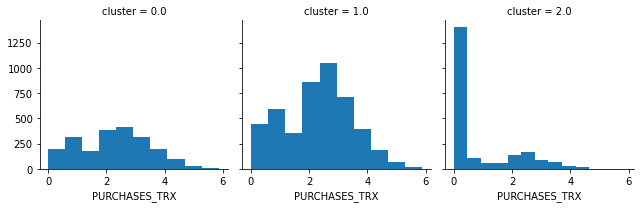

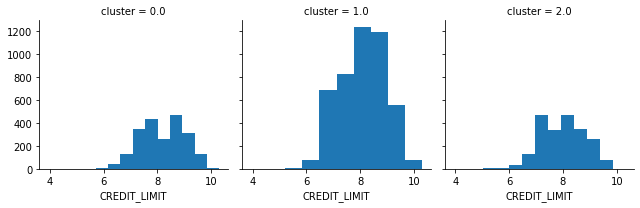

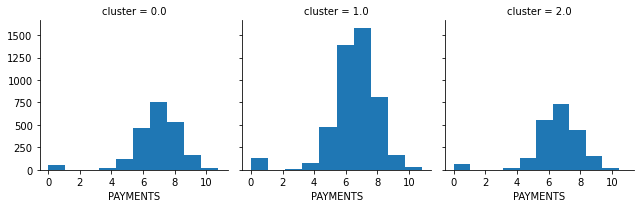

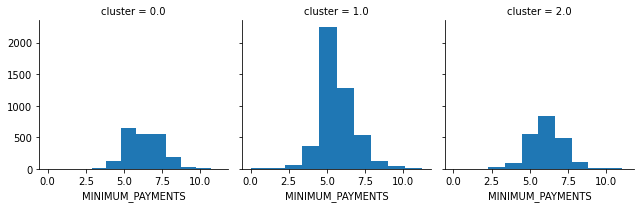

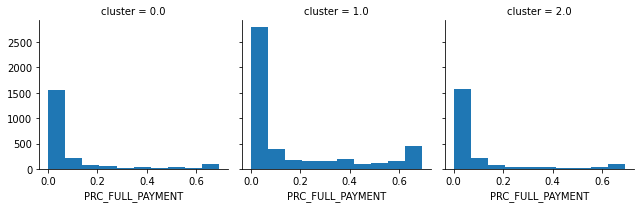

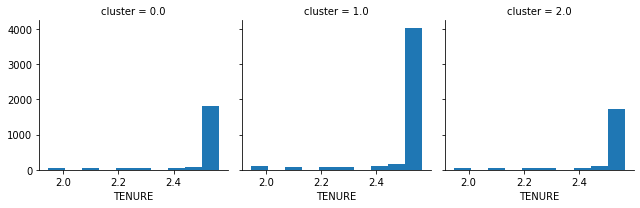

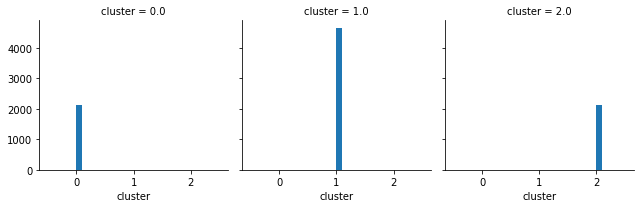

In [53]:
for c in clusters_kmeans:
    grid = sns.FacetGrid(clusters_kmeans, col='cluster')
    grid.map(plt.hist, c)

In [57]:
clusters_kmeans.cluster.value_counts()

1.0    4674
0.0    2140
2.0    2135
Name: cluster, dtype: int64

with plots above we can see that clusters were made based on properties of credit card and how much the customer uses it:

cluster 1 (0): people with low/medium credit card usage

cluster 2 (1): people with high/very high credit card usage

cluster 3 (2): people with very low credit card usage


More detailed information about clusters:

Cluster 1: people with moderate purchases with most purchases being done in one transanction and hence, moderate amount of installments purchases.

Cluster 2: a lot of purchases resulting in higher purchase amount with only some purchases in one go and hence, a lot of the purchases are done installments. Only a little number of people in this cluster keep advance cash.

Cluster 3: people with way less or no purchases at all and hence, lesser one go purchases and installment purchases.

This kind of clustering of customers based on their credit card usage can be used to make marketing strategies to target different customers with different kind of marketing. Like advertising the customers with high credit card usage with specific high end products, luxury or more variety of product whereas the customers with low credit card usage might only be interested in essential products so marketing strategies can be focused around the essentials or specifying how the products might be useful in day-to-day life and so this kind of clustering might be useful for such purposes.